# Problem Statement

Wine Quality Prediction-
Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository.



The wine dataset is a classic and very easy multi-class classification dataset.
Find more about data here - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn import tree
import os
from IPython.display import Image

# Q1. Load the Wine Data file into Python DataFrame. 


Let us assume the data frame is named wine_df


In [90]:
wine_df=pd.read_csv("winequality-red.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Q2. Print 10 samples from the dataset

In [91]:
wine_df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Q3 Print the datatypes of each column and the shape of the dataset 

In [92]:
wine_df.info()
#wine_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [93]:
wine_df.shape

(1599, 12)

In [94]:
wine_df[~wine_df.applymap(np.isreal).all(1)]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality


In [95]:
wine_df.isin([np.nan]).any()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [96]:
wine_df.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

# Let's create a new discreet, categorical response variable/feature ('rating') from existing 'quality' variable.
i.e. bad: 3-5  as 1;
      average: 6 as 2;
      good: 7-8 as 3;

In [97]:
reviews = []
for i in wine_df['quality']:
    if i >= 3 and i <= 5:
        reviews.append('1')
    elif i == 6:
        reviews.append('2')
    elif i >= 7 and i <= 8:
        reviews.append('3')
wine_df['Reviews'] = reviews

In [98]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
Reviews                 1599 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [99]:
wine_df['Reviews']=wine_df['Reviews'].astype(int)

In [100]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
Reviews                 1599 non-null int32
dtypes: float64(11), int32(1), int64(1)
memory usage: 156.2 KB


In [101]:
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [102]:
wine_df.pop('quality')

0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      7
17      5
18      4
19      6
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
       ..
1569    6
1570    6
1571    6
1572    5
1573    6
1574    6
1575    6
1576    6
1577    6
1578    6
1579    5
1580    6
1581    5
1582    5
1583    5
1584    7
1585    6
1586    6
1587    6
1588    6
1589    5
1590    6
1591    6
1592    6
1593    6
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [103]:
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [104]:
wine_df.groupby(['Reviews']).count()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
Reviews,,,,,,,,,,,
1,744,744,744,744,744,744,744,744,744,744,744
2,638,638,638,638,638,638,638,638,638,638,638
3,217,217,217,217,217,217,217,217,217,217,217


# Q4 Print the descriptive statistics of each & every column using describe() function

In [105]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# Q5 Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes).

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


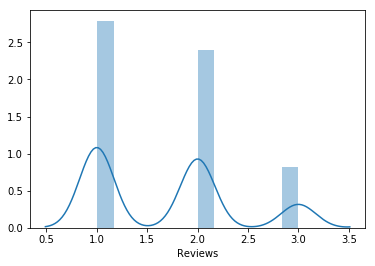

In [106]:
sns.distplot(wine_df['Reviews'])

In [107]:
wine_df.skew()

fixed_acidity           0.982751
volatile_acidity        0.671593
citric_acid             0.318337
residual_sugar          4.540655
chlorides               5.680347
free_sulfur_dioxide     1.250567
total_sulfur_dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
Reviews                 0.559292
dtype: float64

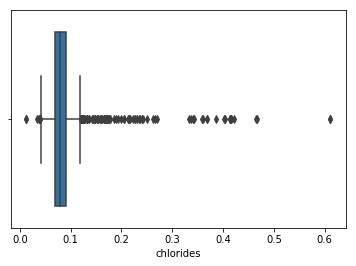

In [108]:
sns.boxplot(x='chlorides',data=wine_df,orient='h')

In [63]:
# Right Skewed

In [109]:
wine_df.kurtosis()

fixed_acidity            1.132143
volatile_acidity         1.225542
citric_acid             -0.788998
residual_sugar          28.617595
chlorides               41.715787
free_sulfur_dioxide      2.023562
total_sulfur_dioxide     3.809824
density                  0.934079
pH                       0.806943
sulphates               11.720251
alcohol                  0.200029
Reviews                 -0.842404
dtype: float64

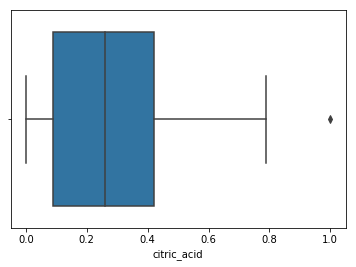

In [110]:
sns.boxplot(x='citric_acid',data=wine_df,orient='h')


In [111]:
# kurtosis gives a negative value which means less data is distributed around the data

# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


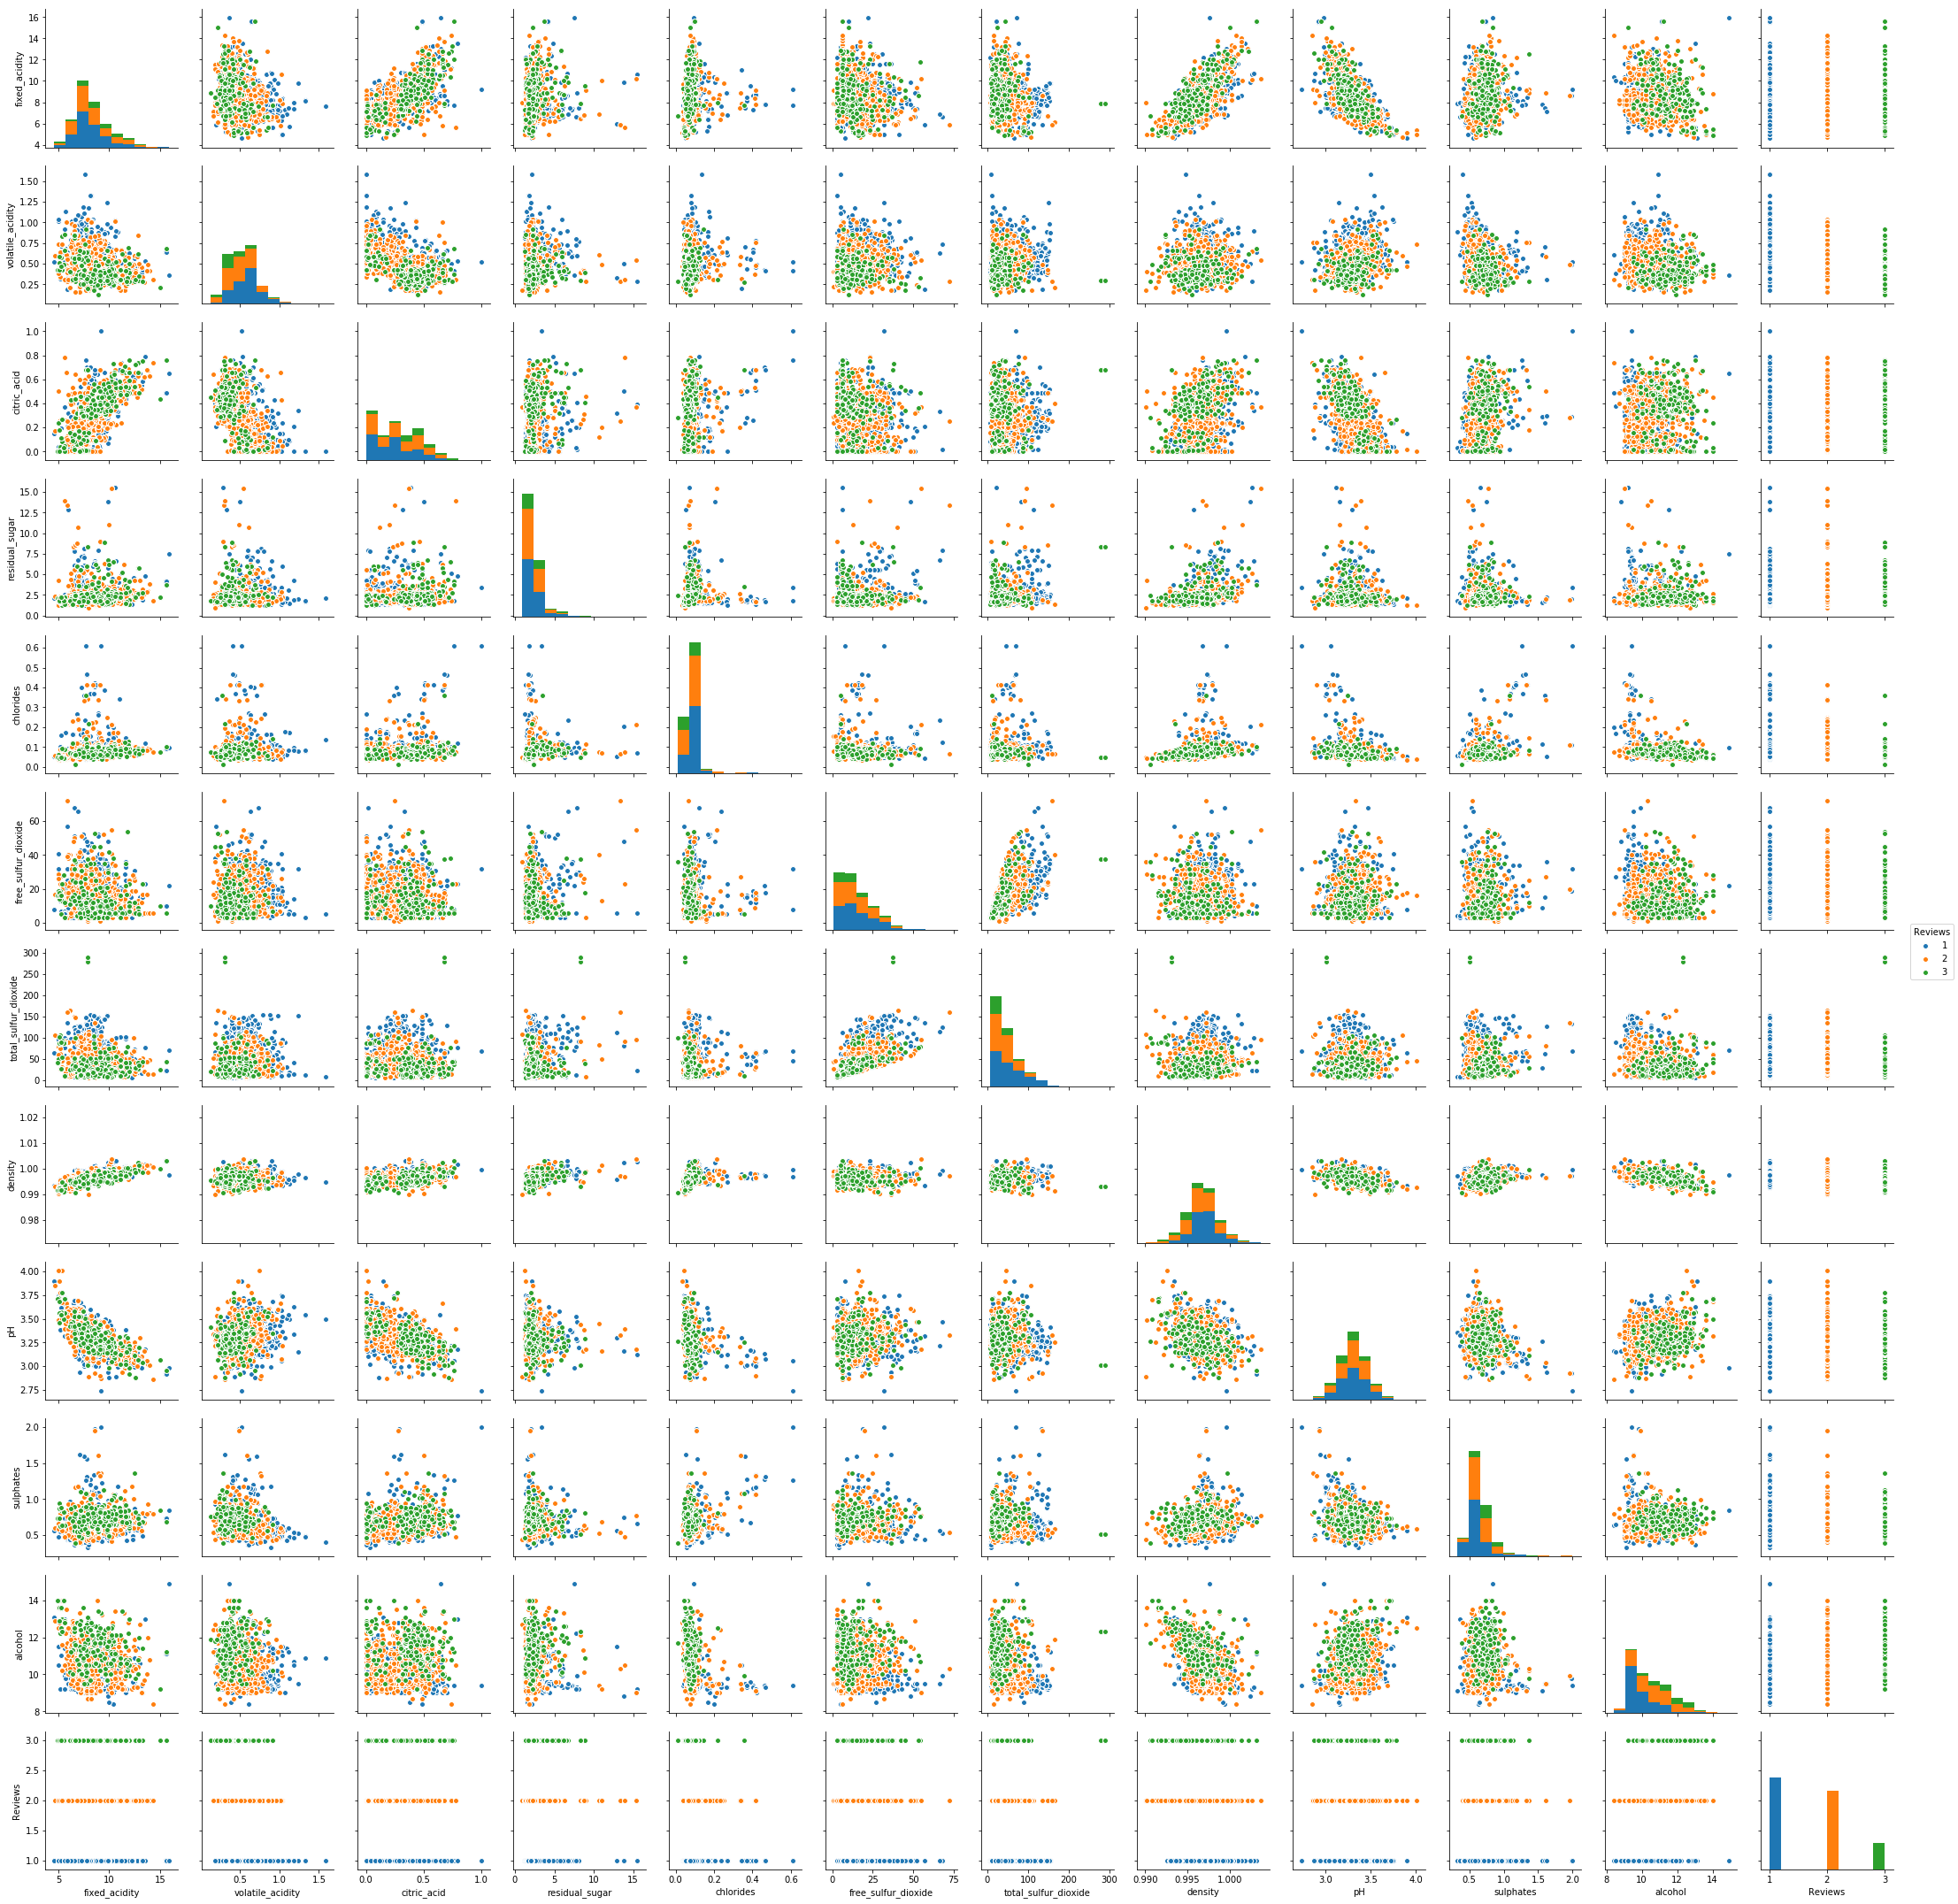

In [112]:
sns.pairplot(wine_df,hue='Reviews')

In [113]:
wine_df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Reviews
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.126195
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.360621
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.217913
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.021784
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.125326
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.078917
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.232983
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.186537
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.030279
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.252378


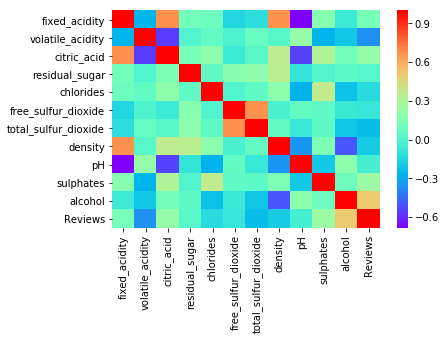

In [114]:
sns.heatmap(wine_df.corr(),cmap="rainbow")

In [115]:
# Alcohol is having a high positive correlation with Reviews

# Q7 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.



In [116]:
array=wine_df.values
X=array[:,0:10]
Y=array[:,11]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

In [117]:
#wine_df.columns

In [118]:
#y=wine_df['Reviews']
#X=wine_df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
#       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
#       'pH', 'sulphates', 'alcohol']]

# Q8 Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.




In [119]:
dt_model=DecisionTreeClassifier(criterion='entropy')

In [120]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q9 Print the accuracy of the model & print the confusion matrix 

In [121]:
print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))
y_predict=dt_model.predict(X_test)
print("Confusion Matrix",metrics.confusion_matrix(y_test,y_predict))

1.0
0.6520833333333333
Confusion Matrix [[162  57   8]
 [ 56 110  15]
 [ 13  18  41]]


# Q10. Regularize the decision tree by limiting the max. depth of trees and print the accuracy.

In [122]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6 )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [123]:
print(dt_model.score(X_test,y_test))
y_predict=dt_model.predict(X_test)
print("Confusion Matrix",metrics.confusion_matrix(y_test,y_predict))

0.6020833333333333
Confusion Matrix [[155  70   2]
 [ 63 111   7]
 [ 10  39  23]]


# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [124]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [125]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , y_test))
print("Confusion Matrix",metrics.confusion_matrix(y_test, y_predict))

0.7125
Confusion Matrix [[188  37   2]
 [ 52 119  10]
 [  7  30  35]]


# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [126]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators=150)
abcl = abcl.fit(X_train, y_train)

In [127]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))
print("Confusion Matrix",metrics.confusion_matrix(y_test, y_predict))

0.6229166666666667
Confusion Matrix [[171  54   2]
 [ 66 101  14]
 [  5  40  27]]


# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [128]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=150)
bgcl = bgcl.fit(X_train, y_train)

In [129]:
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))
print("Confusion Matrix",metrics.confusion_matrix(y_test, y_predict))

0.6541666666666667
Confusion Matrix [[177  49   1]
 [ 62 108  11]
 [  7  36  29]]


# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 150)
gbcl = gbcl.fit(X_train, y_train)


In [131]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
print("Confusion Matrix",metrics.confusion_matrix(y_test, y_predict))

0.6666666666666666
Confusion Matrix [[169  58   0]
 [ 54 114  13]
 [  6  29  37]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [132]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
kfold = model_selection.KFold(n_splits=10, random_state=50)
estimators = []
model1 = DecisionTreeClassifier()
estimators.append(('DecisionTree', model1))
model2 = RandomForestClassifier()
estimators.append(('RandomForest', model2))
model3 = AdaBoostClassifier()
estimators.append(('ADABOOST', model3))
model4 = BaggingClassifier()
estimators.append(('BAGGING', model4))
model5 = GradientBoostingClassifier()
estimators.append(('GRADIENT', model5))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

0.5972366352201258


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
The Combined Accuracy of the Five models is 59.72%